### Reading the output from the yaml workflow

Started: Dec 7 2023

Last Updated: Jan 17, 2024

Akshatha K Vydula


The output files .gsh5 were obtained from the following workflow command:



edges-analysis process edges3_workflow.yaml -i "/home/vydula/data5/edges/data/EDGES3_data/MRO/mro/ant/2023/2023_001_*.acq" --outdir /data4/vydula/edges/edges3-data-analysis/scripts/yaml_files/ --nthreads 1 --stop lst_average


In [1]:
# %matplotlib notebook
import numpy as np

from edges_analysis.gsdata import GSData
from edges_analysis.plots import plot_waterfall

#### Reading all the output files from the YAML workflow

In [2]:
root_dir = "/home/vydula/data4/vydula/edges/edges3-data-analysis/scripts/yaml_files/e3_test_runs/"
date = "2023_070_04_25_17"

convert = GSData.from_file(root_dir + date + "_ant.gsh5")
cal_output = GSData.from_file(root_dir + "dicke_cal/" + date + "_ant_dickecal.gsh5")
rmsf_output = GSData.from_file(
    root_dir + "dicke_cal/" + date + "_ant_dickecal_rmsf.gsh5"
)
lst_output = GSData.from_file(
    root_dir + "dicke_cal/" + date + "_ant_dickecal_rmsf_lstbin.gsh5"
)
select_freq_output = GSData.from_file(
    root_dir + "dicke_cal/" + date + "_ant_dickecal_rmsf_lstbin_aux-filter.gsh5"
)
rfi_output = GSData.from_file(
    root_dir
    + "dicke_cal/"
    + date
    + "_ant_dickecal_rmsf_lstbin_aux-filter_all-filter.gsh5"
)
gauss_smooth_output = GSData.from_file(
    root_dir
    + "dicke_cal/"
    + date
    + "_ant_dickecal_rmsf_lstbin_aux-filter_all-filter_s.gsh5"
)
nw_output = GSData.from_file(
    root_dir
    + "dicke_cal/cal_nw/"
    + date
    + "_ant_dickecal_rmsf_lstbin_aux-filter_all-filter_s_nw.gsh5"
)
loss_correction = GSData.from_file(
    root_dir
    + "dicke_cal/cal_nw/"
    + date
    + "_ant_dickecal_rmsf_lstbin_aux-filter_all-filter_s_nw_loss.gsh5"
)
add_model_output = GSData.from_file(
    root_dir
    + "dicke_cal/cal_nw/"
    + date
    + "_ant_dickecal_rmsf_lstbin_aux-filter_all-filter_s_nw_loss_model.gsh5"
)
gauss_smooth_2_output = GSData.from_file(
    root_dir
    + "dicke_cal/cal_nw/"
    + date
    + "_ant_dickecal_rmsf_lstbin_aux-filter_all-filter_s_nw_loss_model_s.gsh5"
)
phys_model_output = GSData.from_file(
    root_dir
    + "dicke_cal/cal_nw/"
    + date
    + "_ant_dickecal_rmsf_lstbin_aux-filter_all-filter_s_nw_loss_model_s_s_phys_model.gsh5"
)

lst_avg_output = GSData.from_file(
    root_dir + "dicke_cal/cal_nw/rmsfilter/day-averaged.gsh5"
)

add_model_output --> attribute ='residuals'
gauss_smooth_after_cal
lst_average --> one day of data (12 bins)
nsamples --> should stay the same, apart from flags 
in lst)average ---> increases the nsamples (because of all the files)

##### Visualizing Outputs

<Axes: title={'center': 'After convert'}, xlabel='Frequency [MHz]', ylabel='Hours into Observation'>

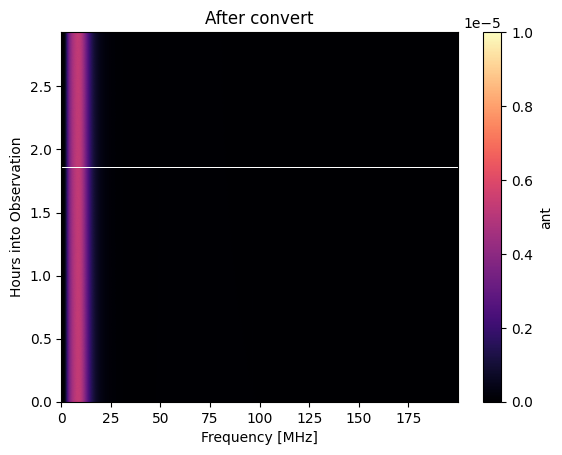

In [3]:
plot_waterfall(convert, attribute="data", clim=[0, 1e-5], title="After convert")

<Axes: title={'center': 'After Dicke Cal'}, xlabel='Frequency [MHz]', ylabel='Hours into Observation'>

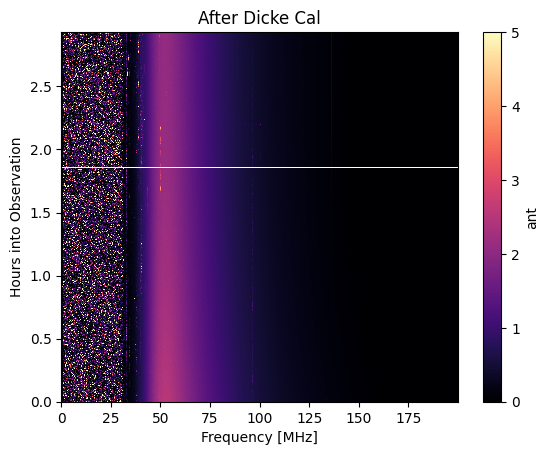

In [4]:
plot_waterfall(cal_output, attribute="data", clim=[0, 5], title="After Dicke Cal")

<Axes: title={'center': 'After RMSF Filter'}, xlabel='Frequency [MHz]', ylabel='Hours into Observation'>

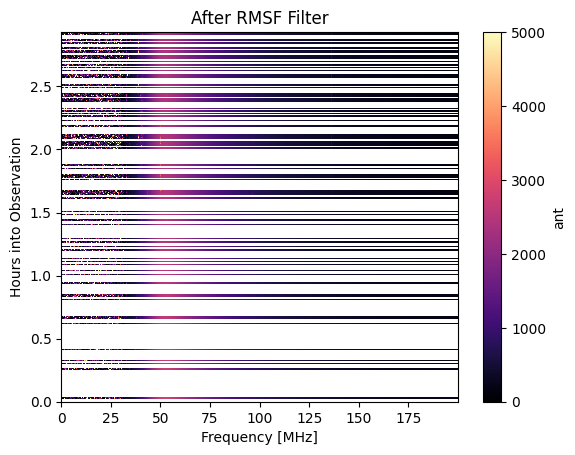

In [5]:
plot_waterfall(rmsf_output, attribute="data", clim=[0, 5000], title="After RMSF Filter")

<Axes: title={'center': 'After LST binning'}, xlabel='Frequency [MHz]', ylabel='LST'>

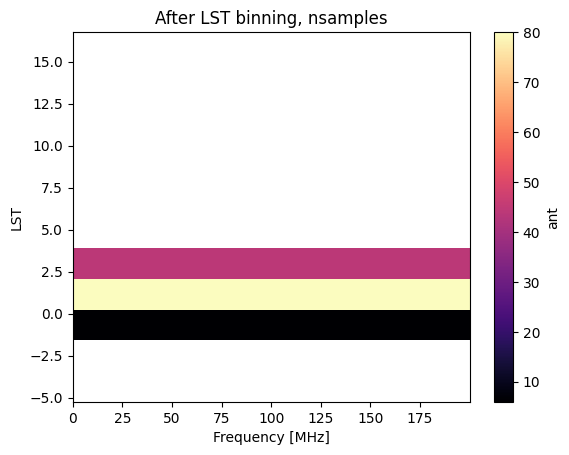

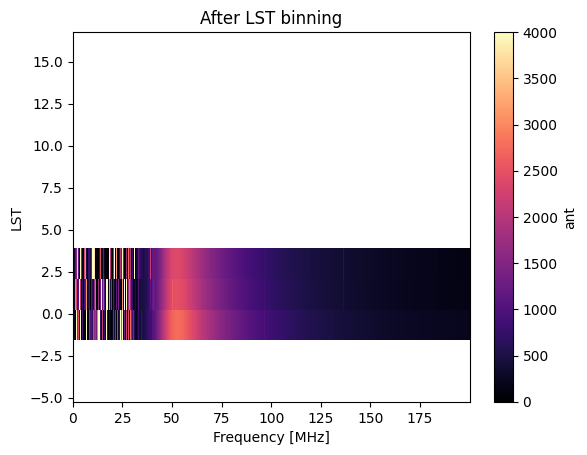

In [6]:
plot_waterfall(lst_output, attribute="nsamples", title="After LST binning, nsamples")
plot_waterfall(lst_output, attribute="data", clim=[0, 4000], title="After LST binning")

<Axes: title={'center': 'After Freq Cut-off'}, xlabel='Frequency [MHz]', ylabel='LST'>

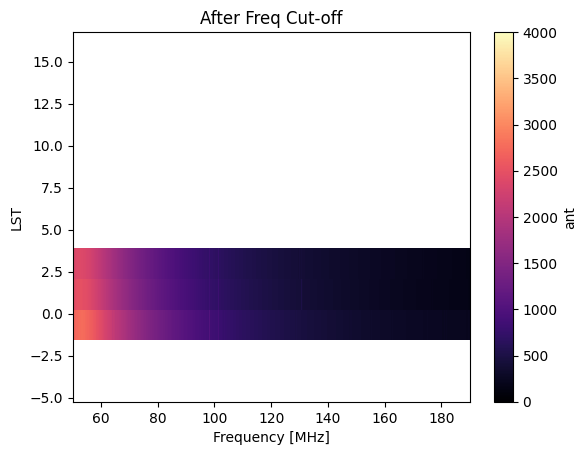

In [7]:
plot_waterfall(select_freq_output, clim=[0, 4000], title="After Freq Cut-off")

<Axes: title={'center': 'After RFI filtering'}, xlabel='Frequency [MHz]', ylabel='LST'>

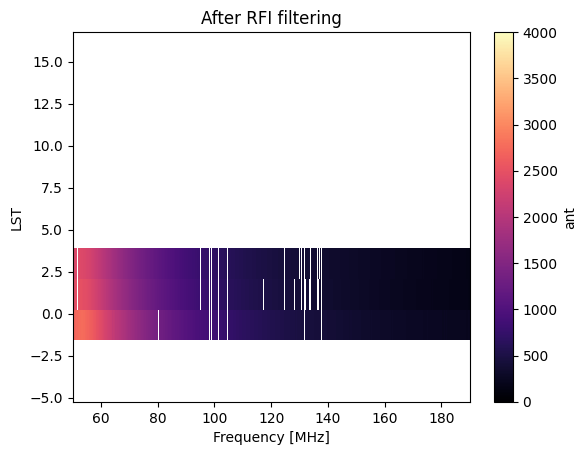

In [8]:
plot_waterfall(rfi_output, clim=[0, 4000], title="After RFI filtering")

<Axes: title={'center': 'After Gauss Smooth'}, xlabel='Frequency [MHz]', ylabel='LST'>

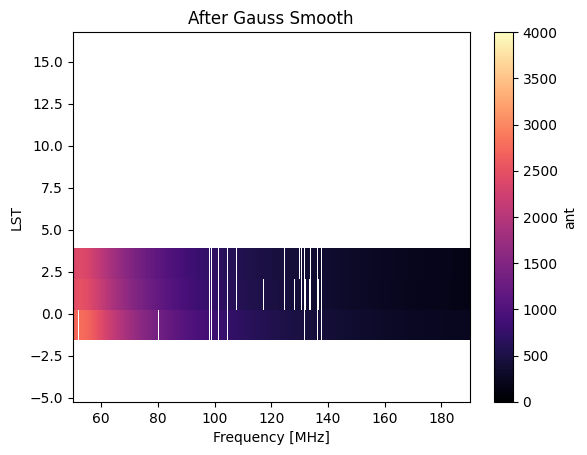

In [9]:
plot_waterfall(gauss_smooth_output, clim=[0, 4000], title="After Gauss Smooth")

<Axes: title={'center': 'After nw calibration'}, xlabel='Frequency [MHz]', ylabel='LST'>

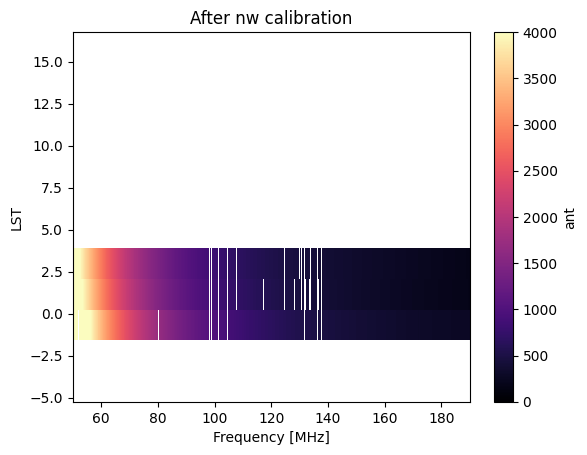

In [10]:
plot_waterfall(nw_output, clim=[0, 4000], title="After nw calibration")

<Axes: title={'center': 'After loss_correction'}, xlabel='Frequency [MHz]', ylabel='LST'>

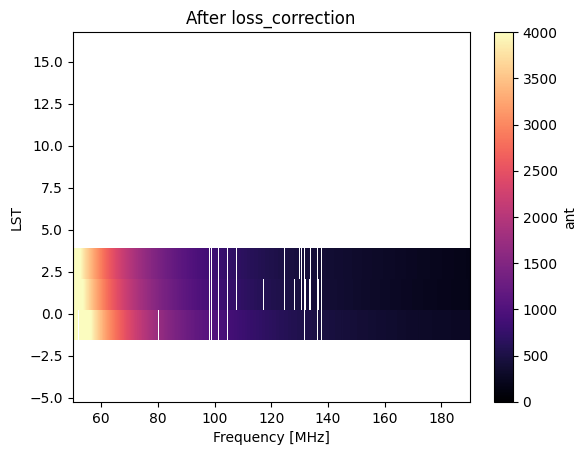

In [11]:
plot_waterfall(loss_correction, clim=[0, 4000], title="After loss_correction")

<Axes: title={'center': 'After 3-term physical linlog add_model'}, xlabel='Frequency [MHz]', ylabel='LST'>

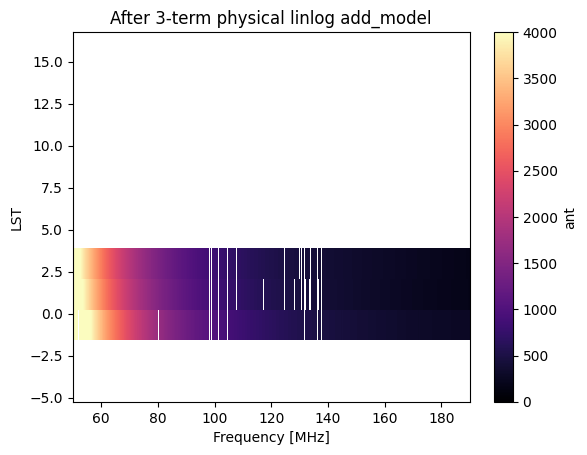

In [12]:
plot_waterfall(
    add_model_output, clim=[0, 4000], title="After 3-term physical linlog add_model"
)

<Axes: title={'center': 'After second gauss_smooth'}, xlabel='Frequency [MHz]', ylabel='LST'>

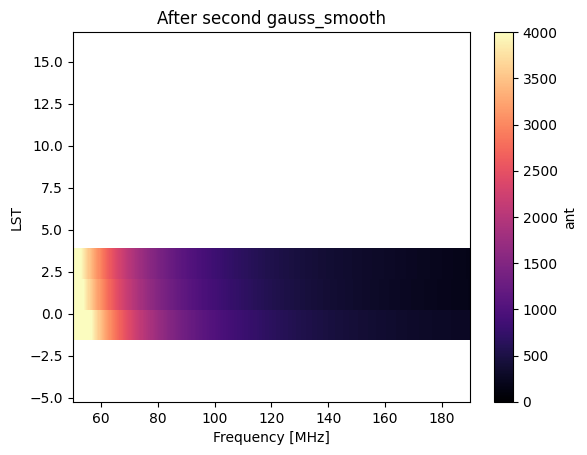

In [13]:
plot_waterfall(gauss_smooth_2_output, clim=[0, 4000], title="After second gauss_smooth")

<Axes: title={'center': 'After add_model'}, xlabel='Frequency [MHz]', ylabel='LST'>

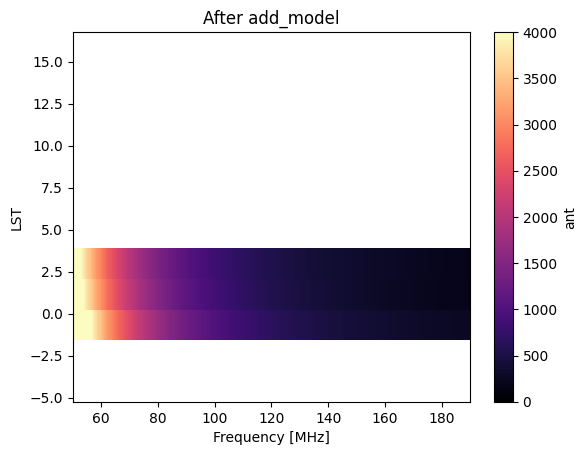

In [14]:
plot_waterfall(phys_model_output, clim=[0, 4000], title="After add_model")

<Axes: title={'center': 'After lst_avg (yaml workflow), Day2023_070'}, xlabel='Frequency [MHz]', ylabel='LST'>

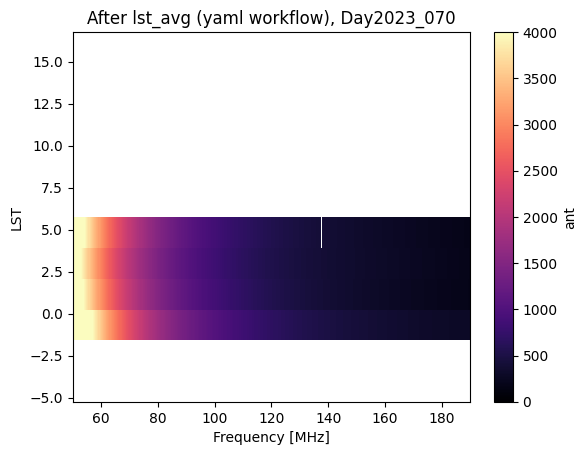

In [15]:
plot_waterfall(
    lst_avg_output,
    clim=[0, 4000],
    title="After lst_avg (yaml workflow), Day" + date[0:8],
)

In [16]:
np.sum(rmsf_output.flagged_nsamples), np.sum(rmsf_output.complete_flags)

(4259840.0, 10485760)